In [119]:
# Correlation Matrix of the all columns - Categorical Variables [Cramer's V Correlation]
# Source: https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix

# Label encoding of the categorical variables for the calculation of the Cramer's V correlation
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()
for i in ABCDEats[non_metric_cols].columns :
  data_encoded[i]=label.fit_transform(ABCDEats[i])
data_encoded.head()

,customer_region,last_promo,payment_method
0,1,0,2
1,8,1,2
2,5,1,1
3,5,0,2
4,5,3,2


In [120]:
# Calculate the Cramer's V correlation matrix
# Source: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
import scipy.stats as ss

def cramers_v(var1,var2):
    """
    Calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(var1,var2).values
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Building of the matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_v(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
cramers_results_ABCDEats = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
cramers_results_ABCDEats

,customer_region,last_promo,payment_method
customer_region,1.00,0.05,0.05
last_promo,0.05,1.00,0.09
payment_method,0.05,0.09,1.00


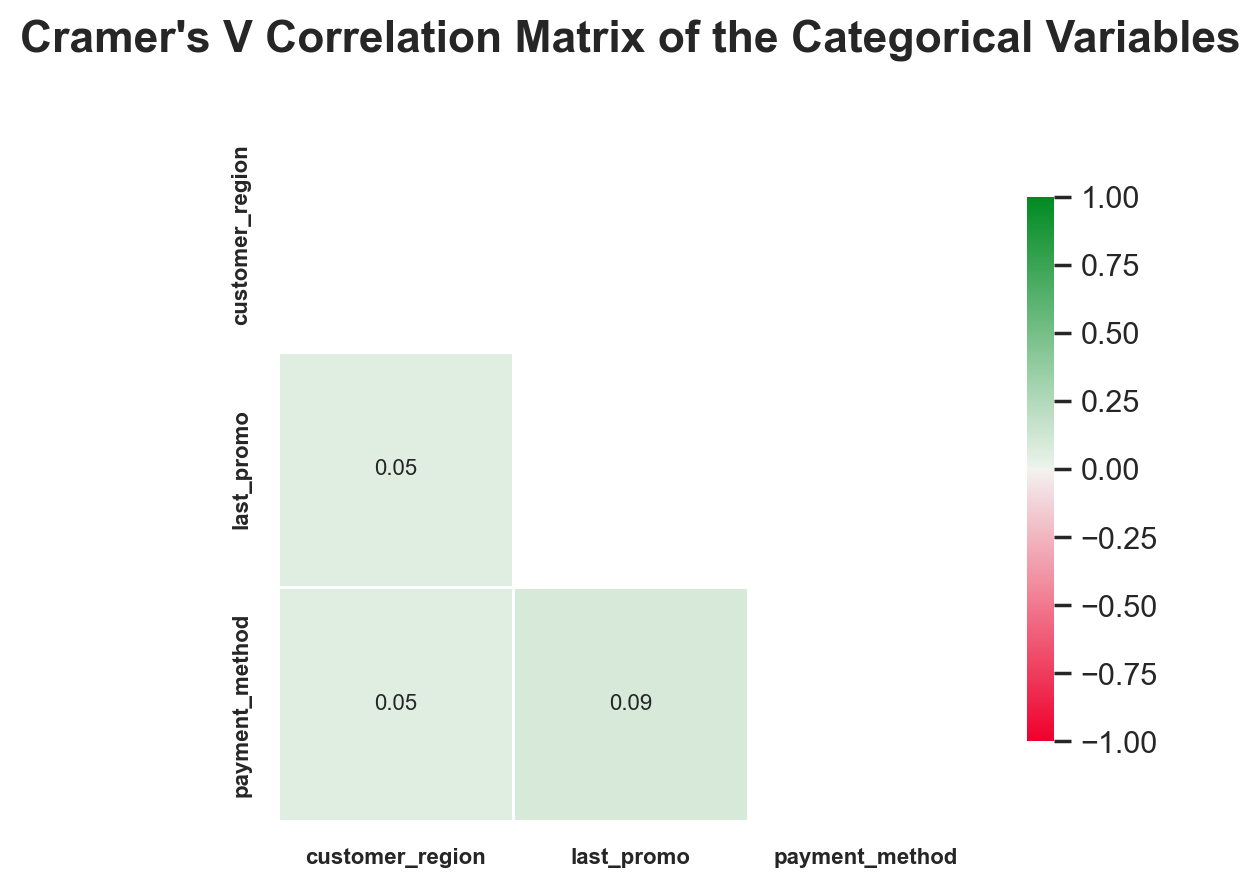

In [121]:
# Heatmap of the Cramer's V correlation matrix
mask = np.zeros_like(cramers_results_ABCDEats, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(5, 5))
sns.heatmap(cramers_results_ABCDEats, cmap=cmap, annot=True, fmt='.2f',
            annot_kws={'fontsize':8}, cbar_kws={'shrink':0.6},
            vmin=-1, vmax=1, center=0, linewidths=0.5, square=True, mask=mask)
plt.title("Cramer's V Correlation Matrix of the Categorical Variables\n", fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()